<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Guided Practice: Explore Python Data Visualization

_Authors: Alexander Combs (New York City), Dave Yerrington (San Francisco), and Kevin Markham (Washington, D.C.)_, _Updated: B Rhodes (DC)_


---

In this guided practice lab you will use Pandas, Matplotlib, and Seaborn to create simple plots.

We'll cover plotting line plots, scatter plots, bar plots, and histograms, and how to manipulate the style of your plots with Matplotlib.

## Learning Objectives

- **Practice** using different types of plots.
- **Use** Pandas methods for plotting.
- **Create** line plots, bar plots, histograms, and box plots.
- **Know** when to use Seaborn or advanced Matplotlib

## Lesson Guide

- [Line Plots](#line-plots)
- [Bar Plots](#bar-plots)
- [Histograms](#histograms)
    - [Grouped Histograms](#grouped-histograms)
    
    
- [Box Plots](#box-plots)
    - [Grouped Box Plots](#grouped-box-plots)
    
- [Scatter Plots](#scatter-plots)
- [Using Seaborn](#using-seaborn)
- [OPTIONAL: Understanding Matplotlib (Figures, Subplots, and Axes)](#matplotlib)
- [OPTIONAL: Additional Topics](#additional-topics)

- [Summary](#summary)

### Introduction

In this lab, we will introduce how plotting works in Pandas and Matplotlib. It is important to know that Pandas uses Matplotlib behind the scenes to make plots. So, you will notice that Pandas plotting methods often use similar parameter names as Matplotlib methods. Further, you can use Matplotlib functions in combination with Pandas methods to alter the plots after drawing them. For example, you can use Matplotlib's `xlabel` and `title` functions to label the plot's x-axis and title, respectively, after it is drawn.

As we explore different types of plots, notice:

1. Different types of plots are drawn very similarly -- they even tend to share parameter names.
2. In Pandas, calling `plot()` on a `DataFrame` is different than calling it on a `Series`. Although the methods are both named `plot`, they may take different parameters.

Toward the end of the lab, we will show some motivational plots using Seaborn, a popular statistics plotting library, as well as go more in-depth about how Matplotlib works.

### Pandas Plotting Documentation

[Link to Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

In [1]:
from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### Create fake data for examples.

In [2]:
df = pd.DataFrame(np.random.randn(10, 4), 
                  columns=['col1', 'col2', 'col3', 'col4'],
                  index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

df

,col1,col2,col3,col4
a,-0.867235,0.417360,0.337861,0.126214
b,1.133301,-2.537520,-0.994082,0.625860
c,-1.767663,0.644230,-0.097527,0.834451
d,1.109103,0.149069,-0.207642,-0.462140
e,0.015230,0.709281,0.888460,-1.007608
f,0.204565,-2.425853,-1.580216,0.535424
g,0.105781,-0.008281,1.409976,0.352521
h,0.993616,-1.039712,-0.018500,-0.855518
i,0.956797,0.562114,0.236312,0.956168
j,-0.346920,-0.003289,-0.706520,-0.376751


### Load in data sets for visualization examples.

The Boston data dictionary can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names). 

The Cleveland heart data dictionary can be found [here](https://archive.ics.uci.edu/ml/datasets/Heart+Disease).

In [6]:
# Read in the ufo data.
ufo_path = '../data/ufo.csv'
ufo = pd.read_csv(ufo_path)
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Year'] = ufo.Time.dt.year

In [7]:
# Read in the Cleveland heart data.
heart_path = '../data/cleveland_heart_data.csv'
heart_df = pd.read_csv(heart_path)

In [8]:
# Read in the Boston housing data.
housing_path = '../data/boston_housing_data.csv'
housing = pd.read_csv(housing_path)

In [9]:
# Read in the drinks data.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
drink_path = '../data/drinks.csv'
drinks = pd.read_csv(drink_path, header=0, names=drink_cols, na_filter=False)

<a id="line-plots"></a>
## Line plots, bar plots & histograms: 

---

Line plots show the trend of a numerical variable over time

- **Objective:** **Use** Pandas methods for plotting.
- **Objective:** **Create** line plots, bar plots, and histograms.

In [10]:
# Count the number of ufo reports each year (and sort by year).
ufo.Year.value_counts().sort_index()

1930       2
1931       2
1933       1
1934       1
1935       1
        ... 
2010    4154
2011    5089
2012    7263
2013    7003
2014    5382
Name: Year, Length: 82, dtype: int64

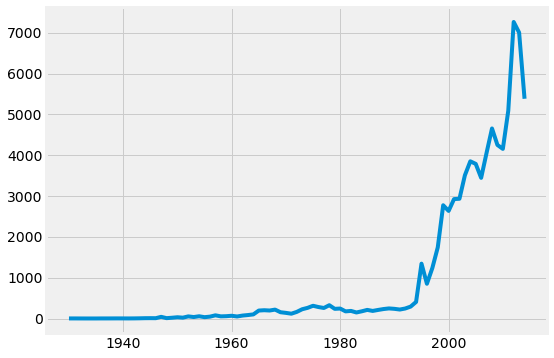

In [11]:
# Compare with line plot -- UFO sightings by year. (Ordering by year makes sense.)
ufo.Year.value_counts().sort_index().plot();

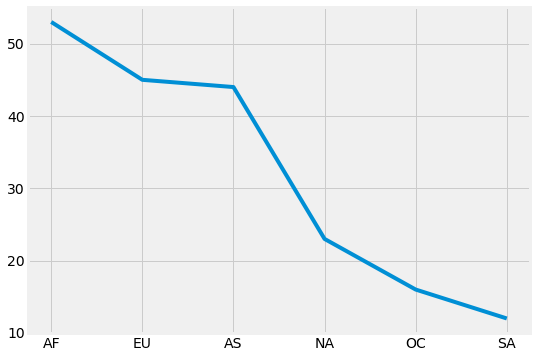

In [12]:
# COMMON MISTAKE: Don't use a line plot when the x-axis cannot be ordered sensically!

# For example, ordering by continent below shows a trend where no exists ... 
#    it would be just as valid to plot the continents in any order.

# So, a line plot is the wrong type of plot for this data.
# Always think about what you're plotting and if it makes sense.

drinks.continent.value_counts().plot();

**Important:** A line plot is the wrong type of plot for this data. Any set of countries can be rearranged misleadingly to illustrate a negative trend, as we did here. Due to this, it would be more appropriate to represent this data using a bar plot, which does not imply a trend based on order.

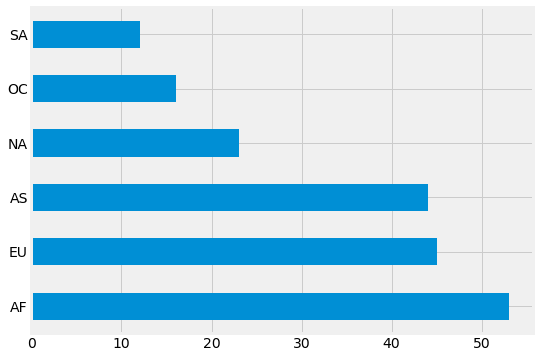

In [13]:
# Plot the same data as a (horizontal) bar plot -- a much better choice!
drinks.continent.value_counts().plot(kind='barh');

### Exercise: Plot ```diag``` in the Heart data
Plot the ```diag``` column using a bar chart.

<AxesSubplot:>

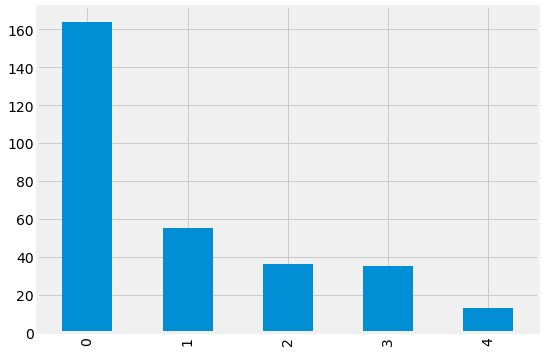

In [14]:
# Plot the diag column on a (vertical) bar chart
heart_df['diag'].value_counts().plot(kind='bar')

### Line Plot With a `DataFrame`

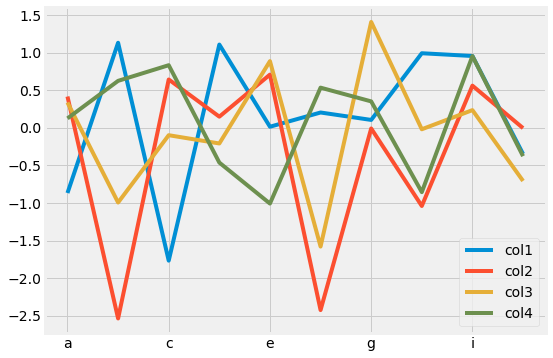

In [15]:
df.plot();

### How to change the size of a plot

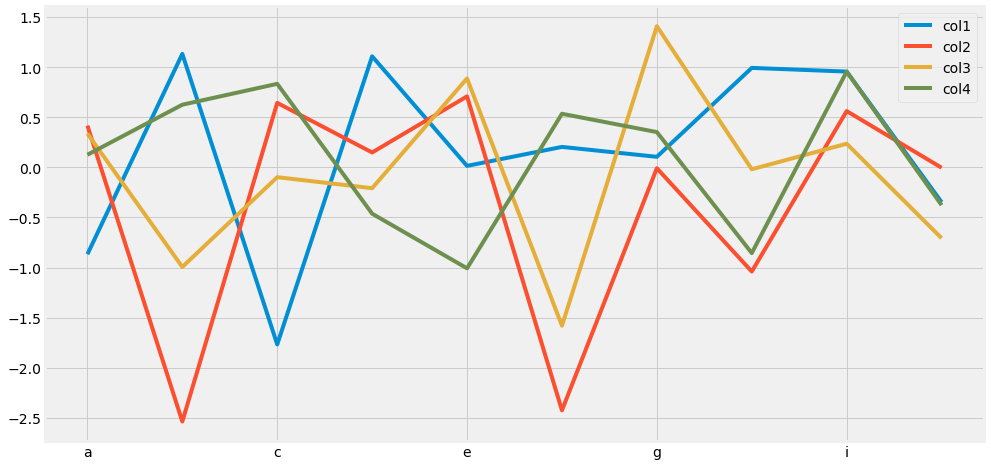

In [16]:
# Technically the figsize is 15 "inches" (width) by 8 "inches" (height)
#   The figure is specified in inches for printing -- you set a dpi (dots/pixels per inch) elsewhere
df.plot(figsize=(15,8)); # width, height

### How to change the color of a plot

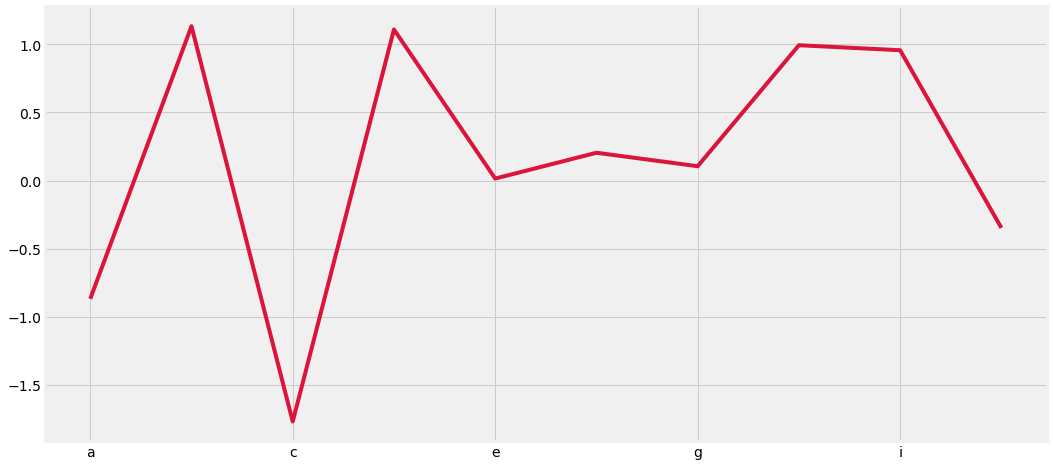

In [17]:
df['col1'].plot(color='crimson', figsize=(16,8));

### How to change the style of individual lines

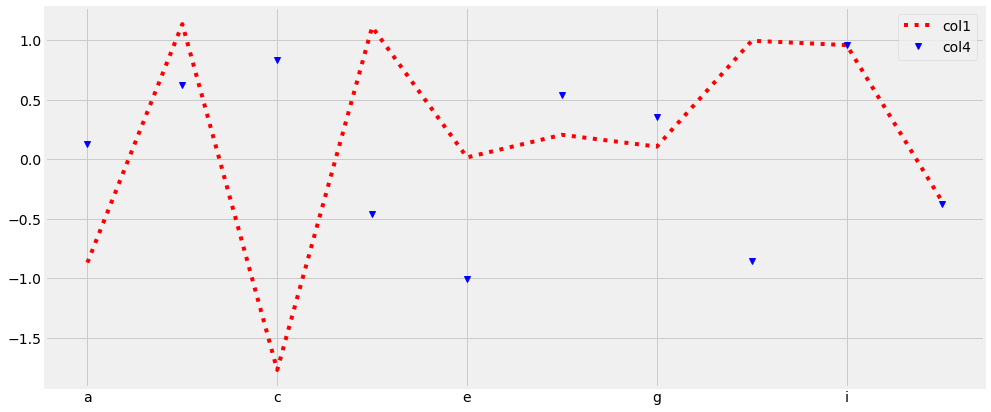

In [18]:
# : - dotted line, v - triangle_down
# r - red, b - blue
df[['col1', 'col4']].plot(figsize=(15,7), style={'col1': ':r', 'col4': 'vb'});

### Challenge: Create a line plot of `chol` and `thalach` in the heart data. 

- Verify the column names. There is a minor discrepancy that needs to be corrected.
- For `chol`, use a solid green line. For `thalach`, use a blue dashed line.
- Change the figure size to a width of 12 and height of 8.
- Change the style sheet (use: ```plt.style.use('STYLE NAME HERE')```
to something you find [here](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html).


#### Clean up the headers (i.e. column names)
We need to take a look at the column names in the heart data. This is a common task as part of data cleaning.

In [19]:
# Look at the headers for the heart data.
# What discrepancies do you see?
# How would you fix them?

#display the column names
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', ' chol ', 'fbs', 'restecg', ' thalach ',
       'exang', 'oldpeak', ' slope', 'ca', 'thal', 'diag'],
      dtype='object')

In [20]:
# How would you fix it?
heart_df.columns = [col.strip() for col in heart_df.columns]

# Verify the fix
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'diag'],
      dtype='object')

<AxesSubplot:>

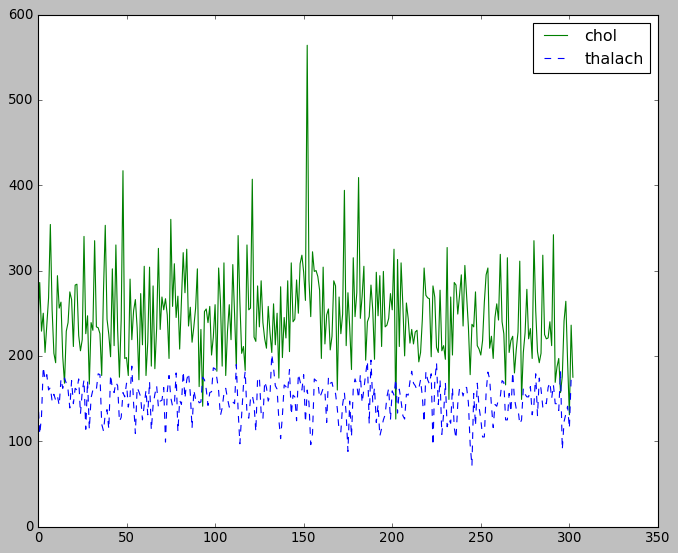

In [21]:
#Change the style sheet

#A:
plt.style.use('classic')

# We can define styles as a list or dictionary
# as a list, order matters. For the dictionary it doesn't.

# use a list
styles = ['g-','b--']

# or use a dictionary
style_dict = {'thalach': 'g-', 'chol': 'b--'}

col_list = ['chol', 'thalach']

heart_df[col_list].plot(figsize=(10,8), style=styles)
#heart_df[mylist].plot(figsize=(10,8), style=style_dict)

In [22]:
# Change the plot style back to fivethirtyeight
plt.style.use('fivethirtyeight')


<a id="bar-plots"></a>
## Bar Plots: Show a numerical comparison across different categories
---

In [23]:
# Count the number of countries in each continent.
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

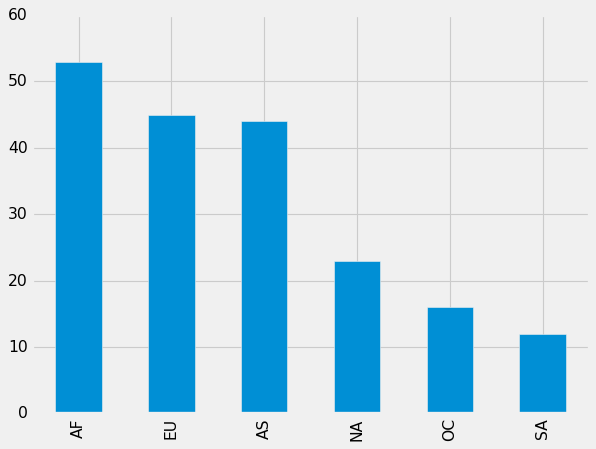

In [24]:
# Compare with bar plot.
drinks.continent.value_counts().plot(kind='bar');

In [25]:
# Calculate the mean alcohol amounts for each continent.
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


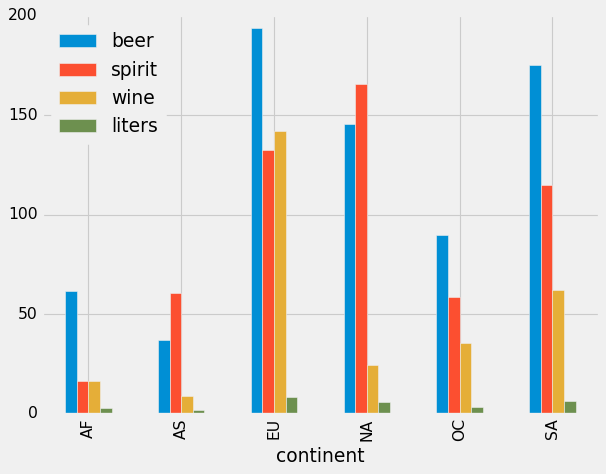

In [26]:
# Side-by-side bar plots
drinks.groupby('continent').mean().plot(kind='bar');

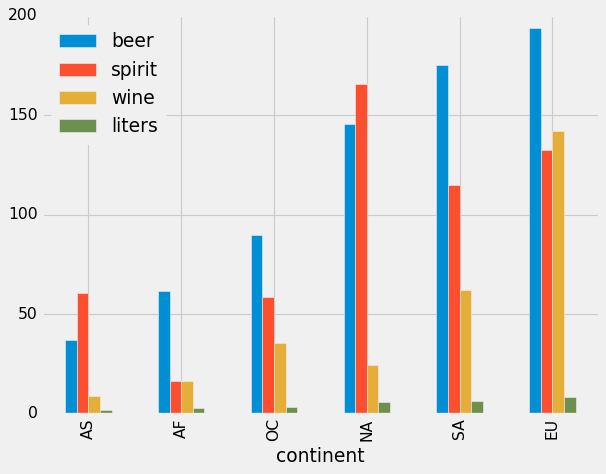

In [27]:
# Sort the continent x-axis by a particular column.
drinks.groupby('continent').mean().sort_values('beer').plot(kind='bar');

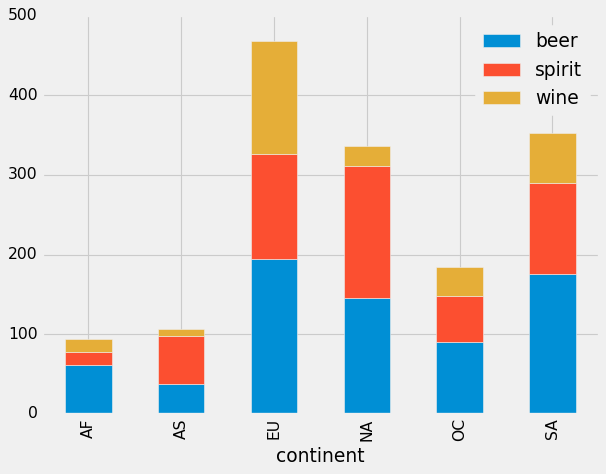

In [28]:
# Stacked bar plot (with the liters comparison removed!)
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar', stacked=True);

#### Exercise: Plot the heart data grouped by ```diag```
1. Plot a subset of the heart data grouped by the ```diag``` column.
2. Do the same plot, but sort by ```'thalach'``` column.

You only need to use the following columns of the heart data set.

```'chol','thalach', 'trestbps', 'diag'```

<AxesSubplot:xlabel='diag'>

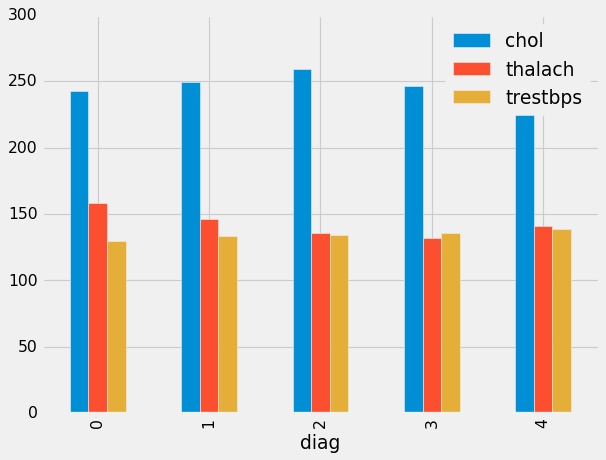

In [29]:
heart_df[['chol','thalach', 'trestbps', 'diag']].groupby('diag').mean().plot(kind='bar')

<AxesSubplot:xlabel='diag'>

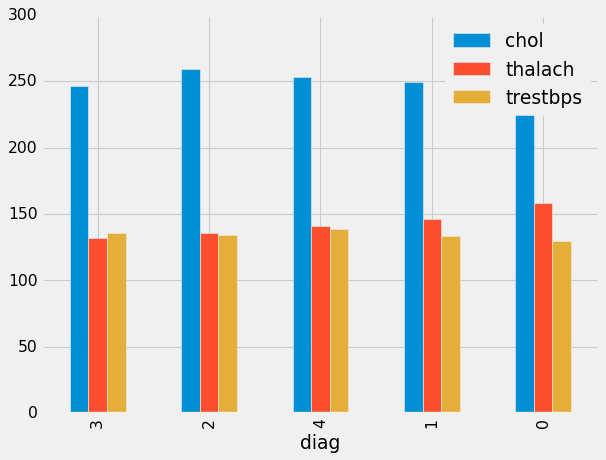

In [30]:
heart_df[['chol','thalach', 'trestbps', 'diag']].groupby('diag').mean().sort_values('thalach').plot(kind='bar')

### Using a `DataFrame` and Matplotlib commands, we can get fancy.

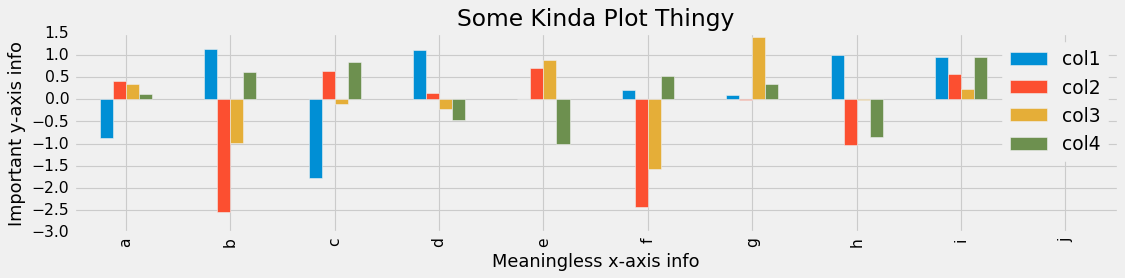

In [31]:
ax = df.plot(kind='bar', figsize=(15,3));

# Set the title.
ax.set_title('Some Kinda Plot Thingy', fontsize=21, y=1.01);

# Move the legend.
ax.legend(loc=1);

# x-axis labels
ax.set_ylabel('Important y-axis info', fontsize=16);

# y-axis labels
ax.set_xlabel('Meaningless x-axis info', fontsize=16);

### Challenge: Create a bar chart using `col1` and `col2`.

- Give the plot a large title of your choosing. 
- Move the legend to the lower-left corner.

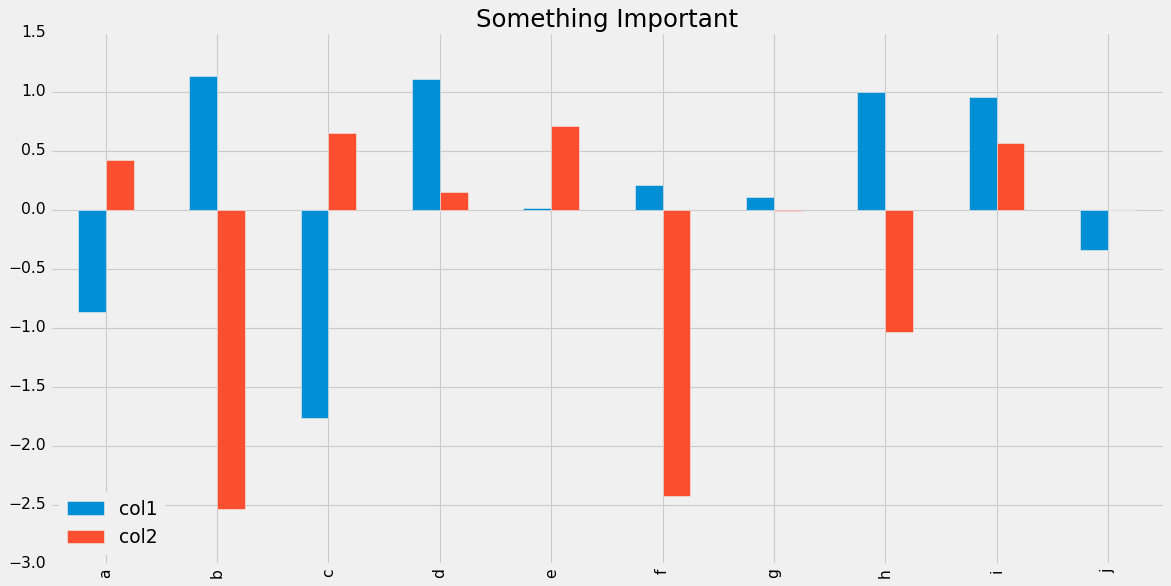

In [32]:
ax = df[['col1','col2']].plot(kind='bar', figsize=(16,8));
ax.set_title('Something Important', fontsize=22);
ax.legend(loc=3);
plt.xticks(rotation=90);

- Do the same thing but with horizontal bars.
- Move the legend to the upper-right corner.

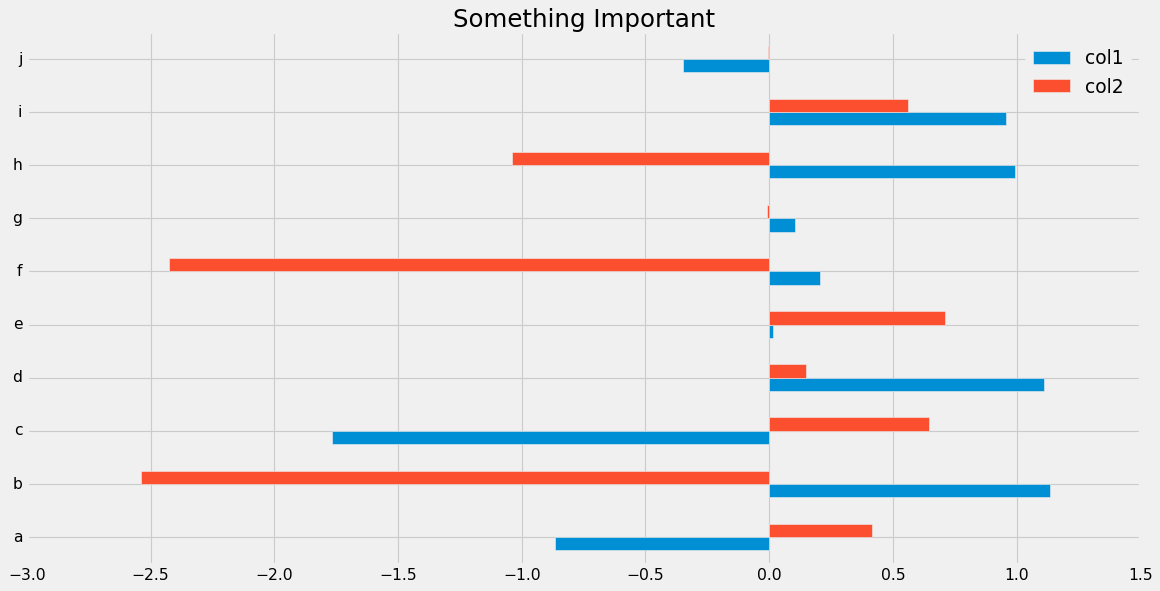

In [33]:
ax = df[['col1','col2']].plot(kind='barh', figsize=(16,8));
ax.set_title('Something Important', fontsize=22);
ax.legend(loc=1);

### Stacked works on horizontal bar charts.

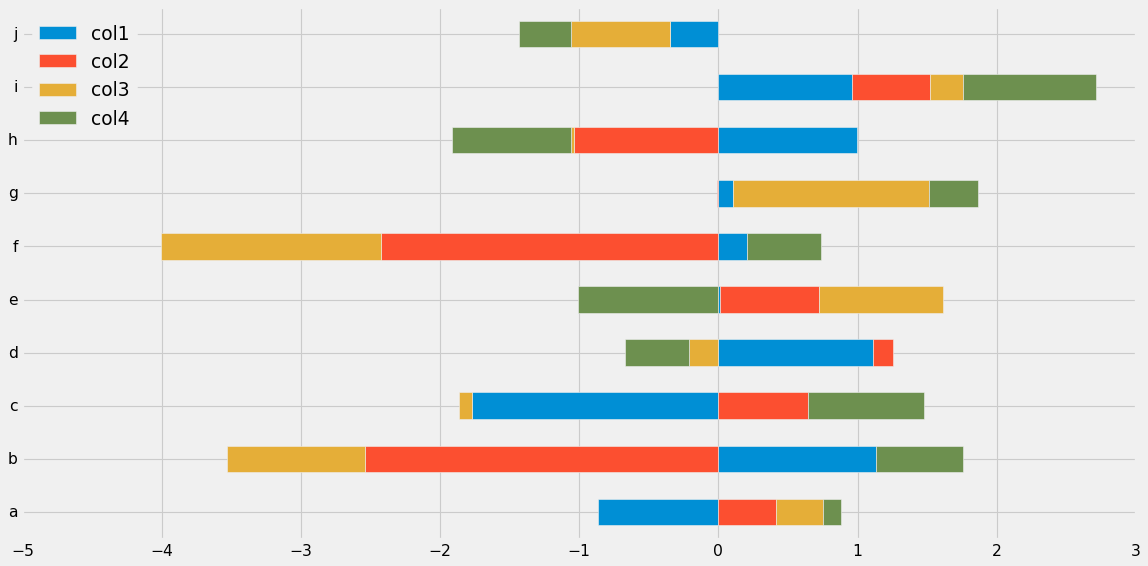

In [34]:
df.plot(kind='barh', stacked=True, figsize=(16,8));

<a id="histograms"></a>
## Histograms: Show the distribution of a numerical variable
---


In [35]:
# Sort the beer column and mentally split it into three groups.
drinks.beer.sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   1,   1,   1,   2,   3,   5,   5,   5,   5,   5,
         6,   6,   6,   6,   8,   8,   8,   9,   9,   9,   9,  12,  13,
        15,  15,  16,  16,  17,  18,  19,  19,  20,  20,  21,  21,  21,
        21,  22,  23,  25,  25,  25,  25,  26,  28,  31,  31,  31,  31,
        32,  32,  34,  36,  36,  36,  37,  42,  42,  43,  44,  45,  47,
        49,  51,  51,  52,  52,  52,  53,  56,  56,  57,  58,  60,  62,
        62,  63,  64,  69,  71,  76,  76,  77,  77,  77,  78,  79,  82,
        82,  85,  88,  89,  90,  92,  93,  93,  98,  99, 102, 105, 106,
       109, 111, 115, 120, 122, 124, 127, 128, 130, 133, 140, 142, 143,
       144, 147, 149, 149, 152, 157, 159, 162, 163, 167, 169, 171, 173,
       185, 188, 192, 193, 193, 194, 194, 196, 197, 199, 203, 206, 213,
       217, 219, 224, 224, 225, 230, 231, 233, 234, 236, 238, 240, 245,
       245, 247, 249, 251, 261, 263, 263, 270, 279, 281, 283, 28

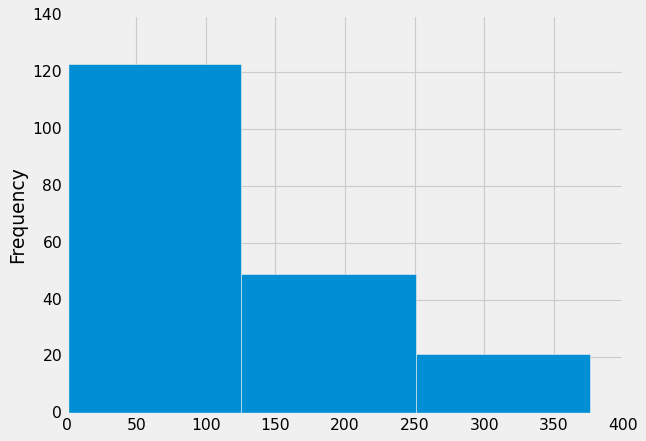

In [36]:
# Compare the above with histogram.
# About how many of the points above are in the groups 1-125, 125-250, and 250-376?
drinks.beer.plot(kind='hist', bins=3);

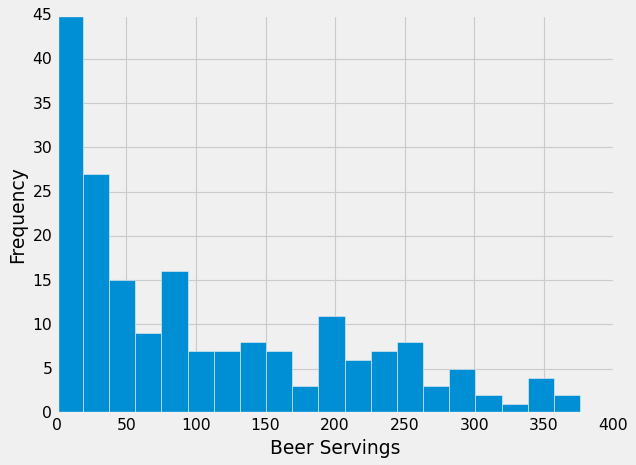

In [37]:
# Try more bins — it takes the range of the data and divides it into 20 evenly spaced bins.
drinks.beer.plot(kind='hist', bins=20);
plt.xlabel('Beer Servings');
plt.ylabel('Frequency');

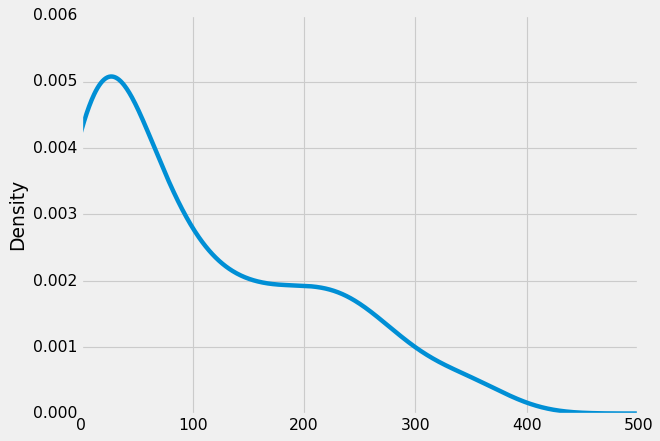

In [38]:
# Compare with density plot (smooth version of a histogram).
drinks.beer.plot(kind='density', xlim=(0, 500));

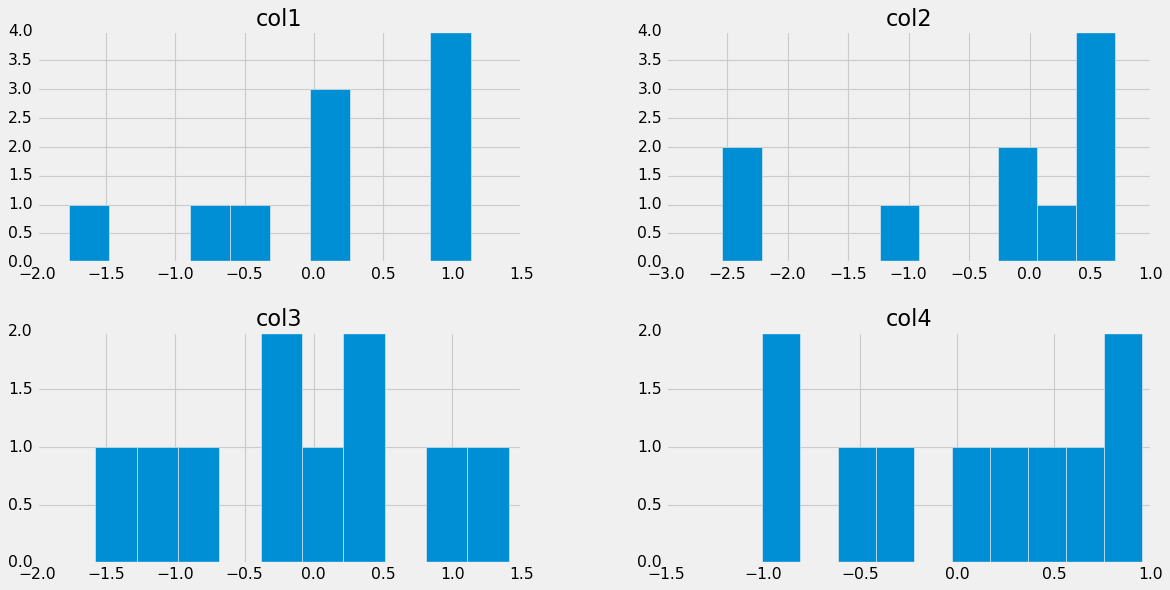

In [39]:
# Making histograms of DataFrames — histogram of random data
df.hist(figsize=(16,8));

### Single Histogram

In [40]:
norm = np.random.standard_normal(5000)

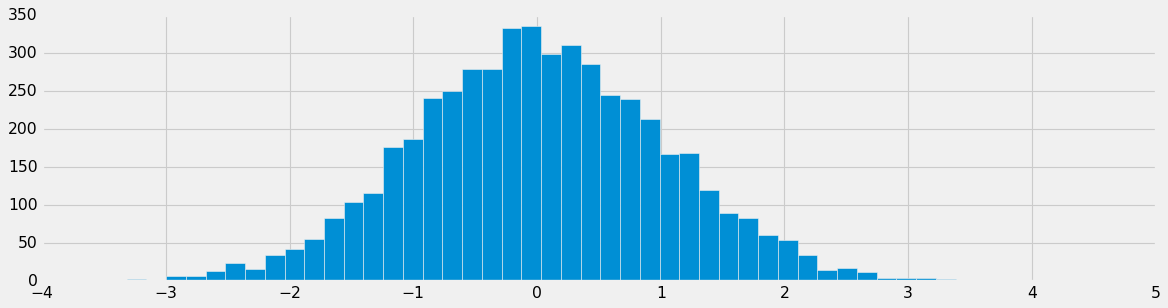

In [41]:
pd.Series(norm).hist(figsize=(16,4), bins=50);

### Another bins example: Sometimes the binning makes the data look different or misleading.

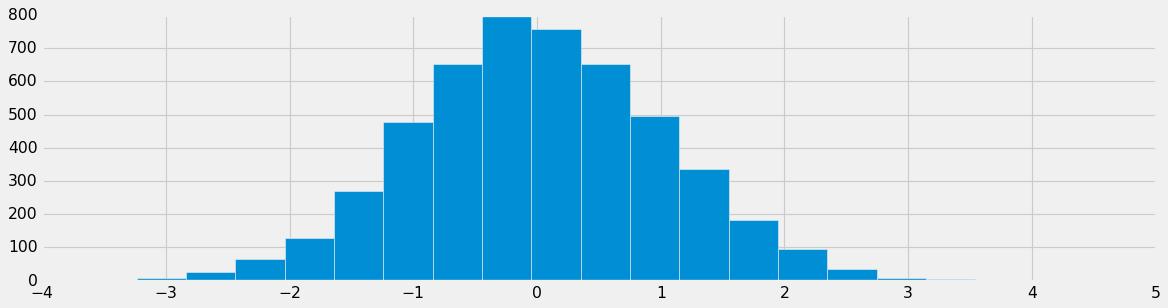

In [42]:
pd.Series(norm).hist(figsize=(16,4), bins=20);

### Exercise: Using Pandas create a histogram for `chol` in the heart data.
- Set the bins to 20.
- Create an appropriate title for the plot.
- Label the x & y axes appropriately.

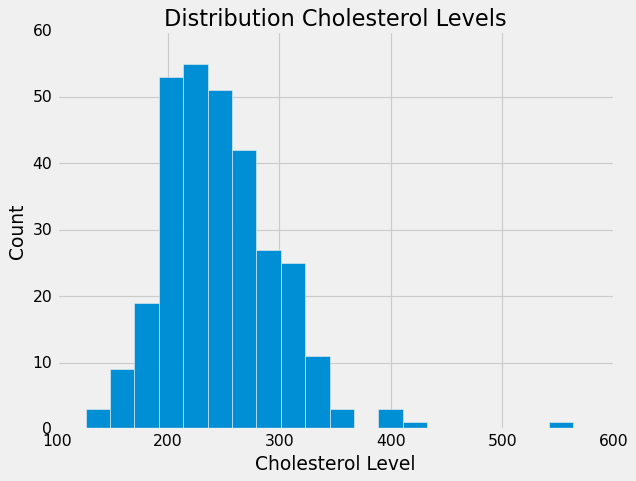

In [43]:
# Reminder: Overall histogram of cholesterol
ax = heart_df['chol'].hist(bins=20)
ax.set_title('Distribution Cholesterol Levels');
plt.xlabel('Cholesterol Level');
plt.ylabel('Count');

<a id="grouped-histograms"></a>
### Grouped histograms: Show one histogram for each group.

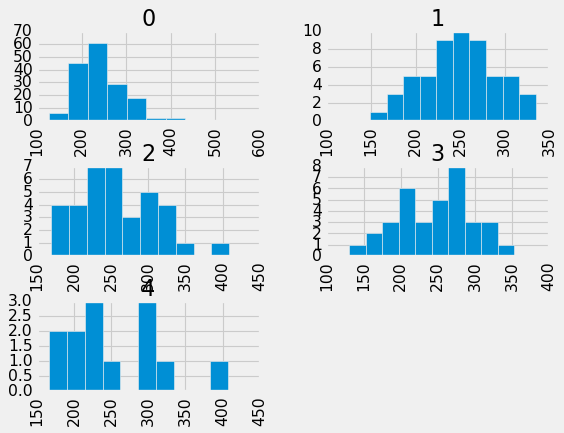

In [44]:
heart_df.hist(column='chol', by='diag');


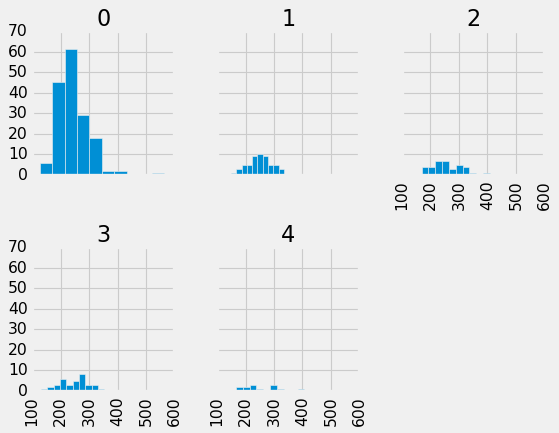

In [45]:
# Share the x- and y-axes.
heart_df.hist(column='chol', by='diag', sharex=True, sharey=True, layout=(2, 3));

<a id="box-plots"></a>
## Box Plots: Show quartiles (and outliers) for one or more numerical variables
---

We can use boxplots to quickly summarize distributions.

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

(It's more useful than mean and standard deviation for describing skewed distributions.)

**Interquartile Range (IQR)** = Q3 - Q1

**Outliers:**

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

You can see more on how to read a boxplot [here](https://www.mathbootcamps.com/how-to-read-a-boxplot/).

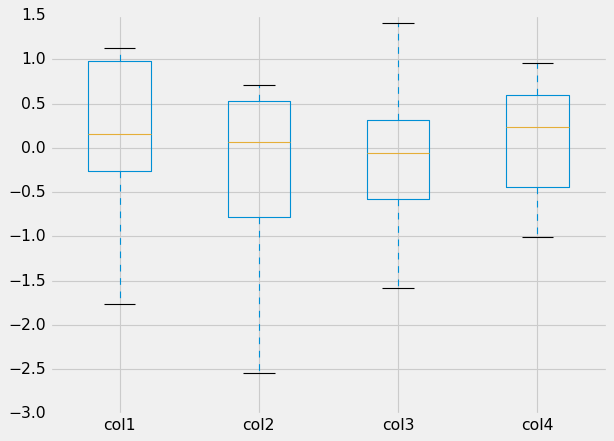

In [46]:
df.boxplot();

### Let's see how box plots are generated so we can best interpret them.

In [47]:
# Sort the spirit column.
drinks.spirit.sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   2,   2,   2,   2,   2,   2,
         3,   3,   3,   3,   3,   3,   3,   3,   4,   4,   4,   5,   5,
         6,   6,   6,   7,   9,  11,  11,  12,  13,  15,  15,  16,  16,
        18,  18,  18,  18,  19,  21,  21,  22,  22,  25,  25,  27,  29,
        31,  31,  34,  35,  35,  35,  35,  38,  39,  41,  41,  42,  42,
        44,  46,  50,  51,  55,  56,  57,  60,  61,  63,  63,  65,  67,
        68,  69,  69,  69,  71,  71,  72,  74,  75,  76,  76,  79,  81,
        84,  87,  87,  88,  97,  97,  98,  98, 100, 100, 100, 100, 101,
       104, 104, 112, 114, 114, 114, 117, 117, 118, 118, 122, 122, 124,
       126, 128, 131, 132, 133, 133, 135, 137, 138, 145, 147, 151, 152,
       154, 156, 157, 158, 160, 170, 173, 173, 176, 178, 179, 186, 189,
       192, 194, 200, 202, 205, 215, 215, 216, 221, 226, 237, 24

In [48]:
# Show "five-number summary" for spirit.
drinks.spirit.describe()

count    193.000000
mean      80.994819
std       88.284312
min        0.000000
25%        4.000000
50%       56.000000
75%      128.000000
max      438.000000
Name: spirit, dtype: float64

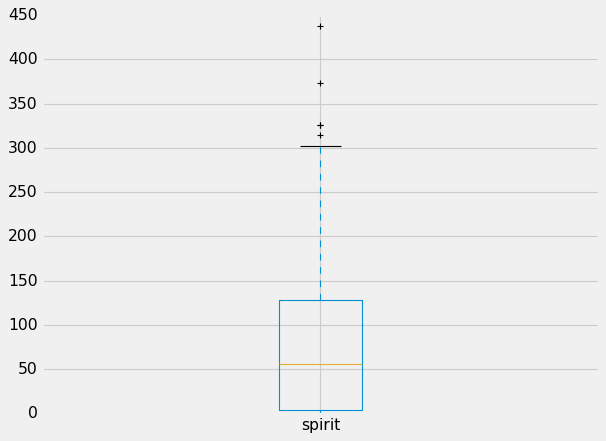

In [49]:
# Compare with box plot.
drinks.spirit.plot(kind='box');

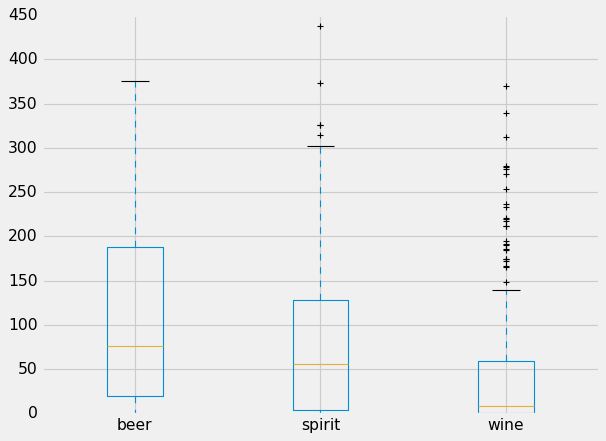

In [50]:
# Include multiple variables.
drinks.drop('liters', axis=1).plot(kind='box');

### How to use a box plot to preview the distributions in the heart data

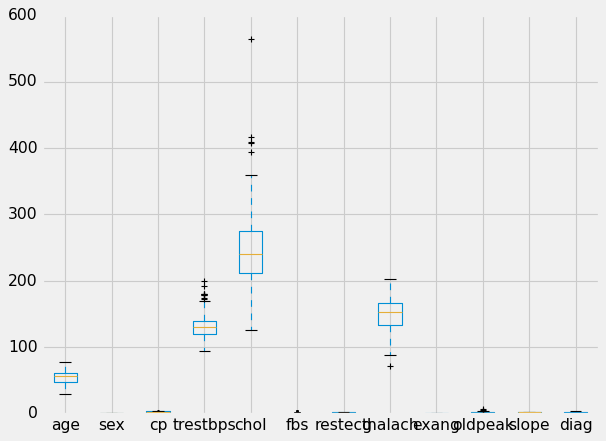

In [51]:
heart_df.boxplot();

<a id="grouped-box-plots"></a>
### Grouped box plots: Show one box plot for each group.

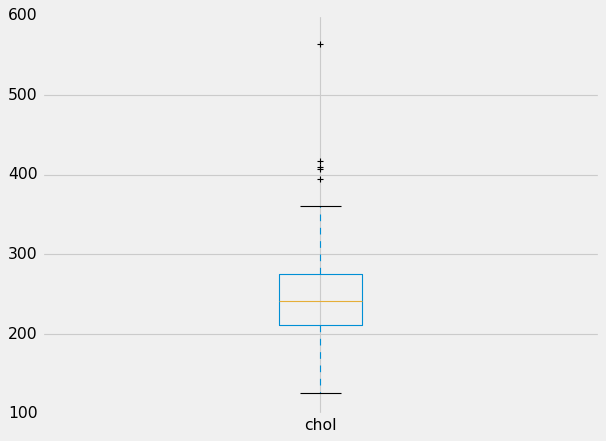

In [52]:
# Reminder: box plot of cholesterol levels
heart_df.chol.plot(kind='box');

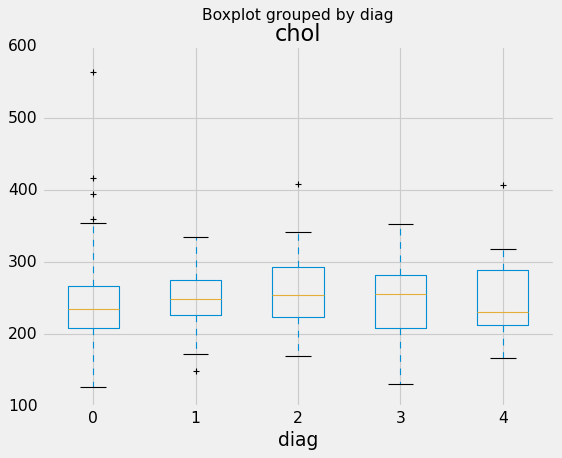

In [53]:
# Box plot of beer servings grouped by continent
#drinks.boxplot(column='beer', by='continent');
heart_df.boxplot(column='chol', by='diag');

##### Exercise: Make a box plot for heart data grouped by ```diag```

1. Make a box plot for the features ```'chol', 'thalach', 'trestbps'``` grouped by ```diag```

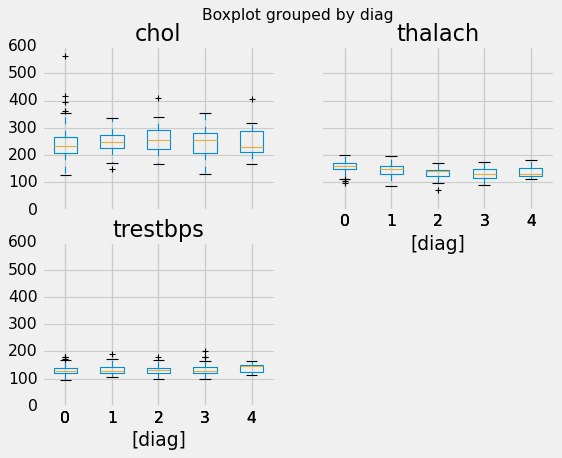

In [54]:
# Box plot of select numeric columns grouped by diag
heart_df[['chol', 'thalach', 'trestbps', 'diag']].boxplot(by='diag');


<a id="scatter-plots"></a>
## Scatter plots: Show the relationship between two numerical variables
---


In [55]:
# Select the beer and wine columns and sort by beer.
drinks[['beer', 'wine']].sort_values('beer')

,beer,wine
0,0,0
40,0,74
79,0,0
90,0,0
97,0,0
...,...,...
135,343,56
65,346,175
62,347,59
45,361,134


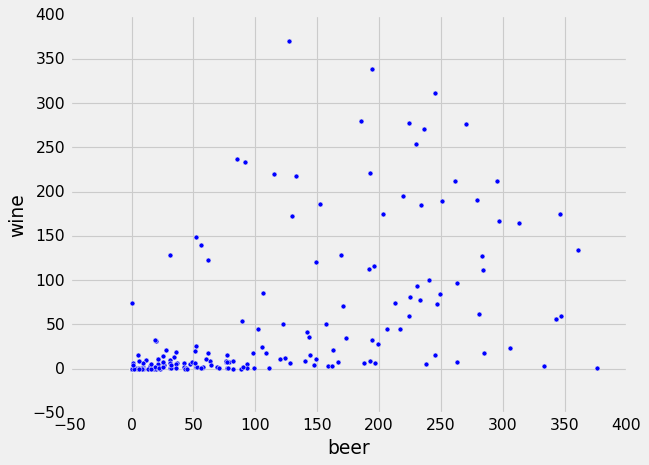

In [56]:
# Compare with scatter plot.
drinks.plot(kind='scatter', x='beer', y='wine');

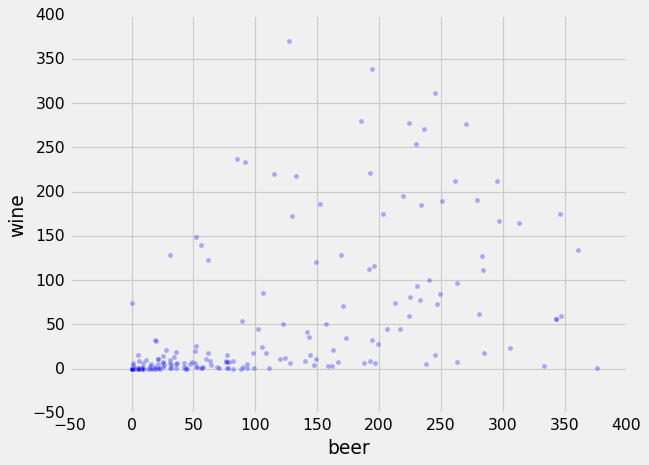

In [57]:
# Add transparency (great for plotting several graphs on top of each other, or for illustrating density!).
drinks.plot(kind='scatter', x='beer', y='wine', alpha=0.3);

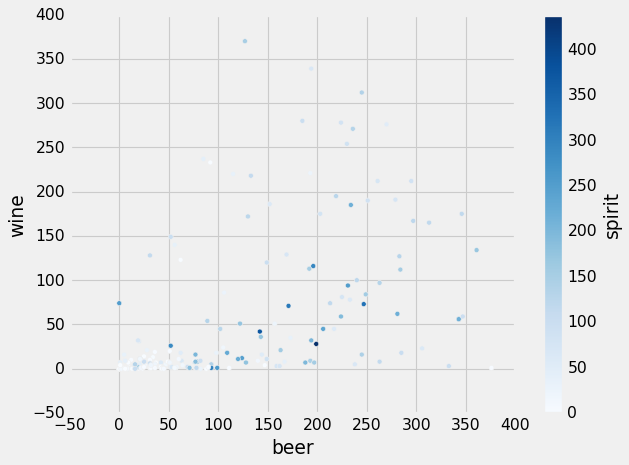

In [58]:
# Vary point color by spirit servings.
drinks.plot(kind='scatter', x='beer', y='wine', c='spirit', colormap='Blues');

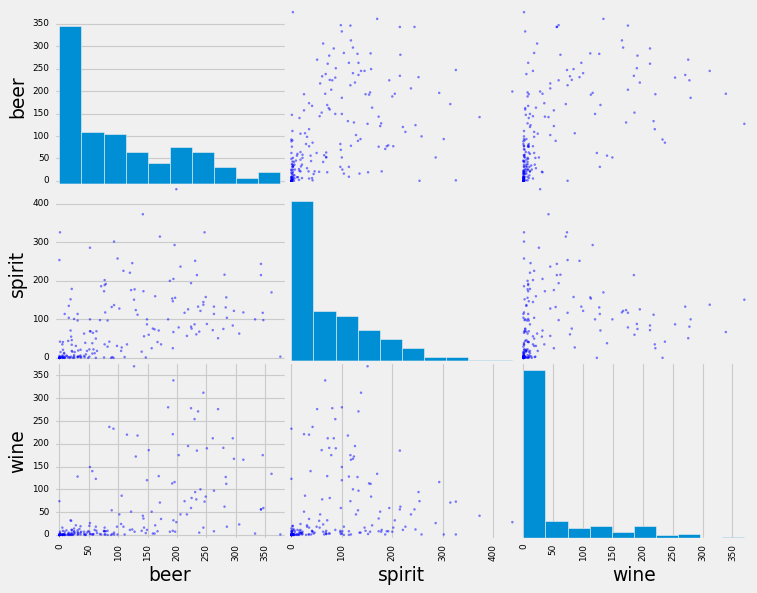

In [59]:
# Scatter matrix of three numerical columns
pd.plotting.scatter_matrix(drinks[['beer', 'spirit', 'wine']], figsize=(10, 8));

##### Exercise: create a scatter matrix for the heart data.

1. using pandas create a scatter plot for the following features ```'chol', 'thalach', 'trestbps'```

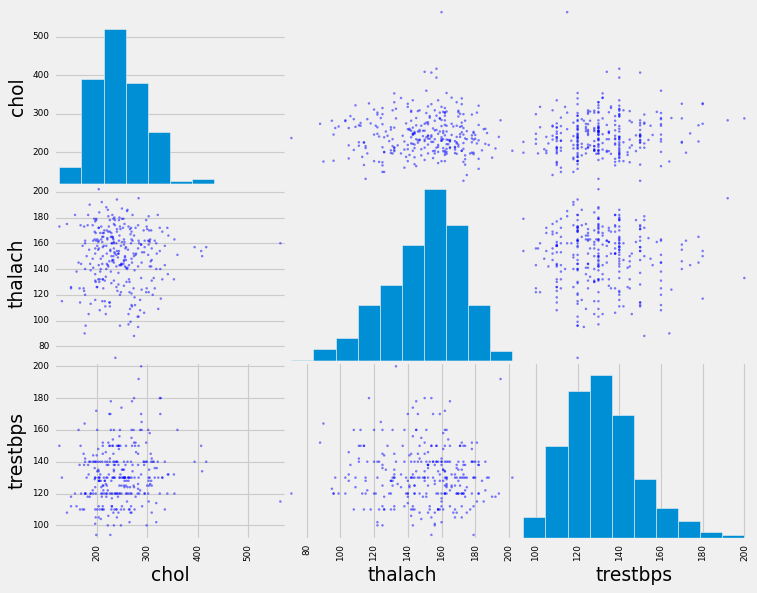

In [60]:
## create a scatter plot using pandas

cols = ['chol', 'thalach', 'trestbps']
pd.plotting.scatter_matrix(heart_df[cols], figsize=(10, 8));

### Plotting `DataFrames`

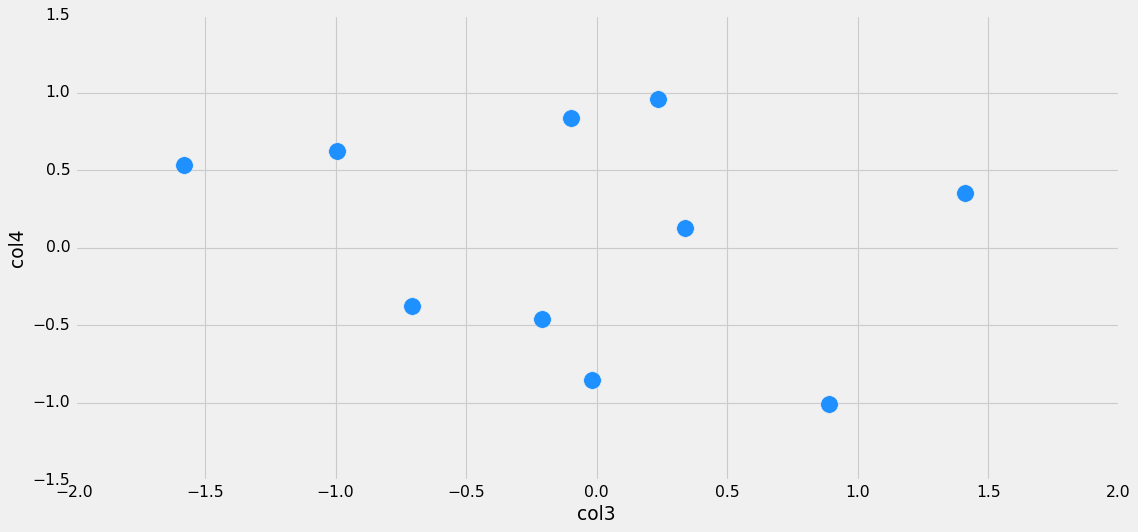

In [61]:
df.plot(x='col3', y='col4', kind='scatter', color='dodgerblue',
        figsize=(15,7), s=250);

#### Exercise: View the association between the variables `chol` and `trestbps` using a scatter plot
1. create a scatterplot of ```chol``` vs ```trestbps```. Use the following parameters.
- set figure size to (15,7)
- set marker size to 100
- set color to ```dodgerblue```
2. Give the plot an appropriate title.

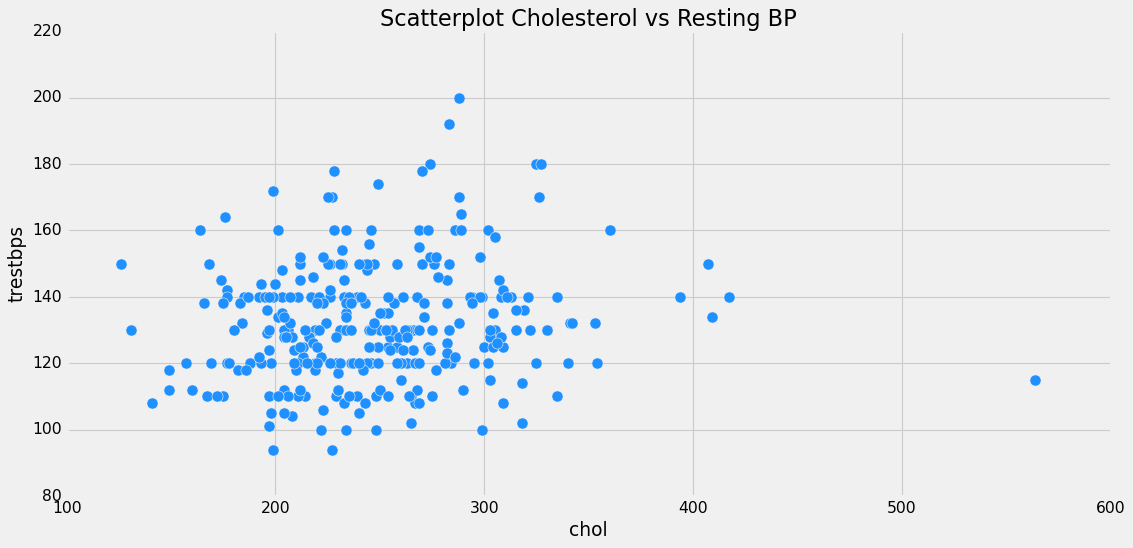

In [62]:
ax = heart_df.plot(x='chol', y='trestbps', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=100);
ax.set_title('Scatterplot Cholesterol vs Resting BP');

### How to use a list comprehension to change the size of the scatter plot dots based on a selected feature.
We've seen we can set the size of the marker in our scatter plot. Now we'll show how to make that marker size variable based on the values of another feature in data.

Here we're still plotting ```chol``` vs ```trestbps```, but now we set the marker size as a function of the feature ```oldpeak```.

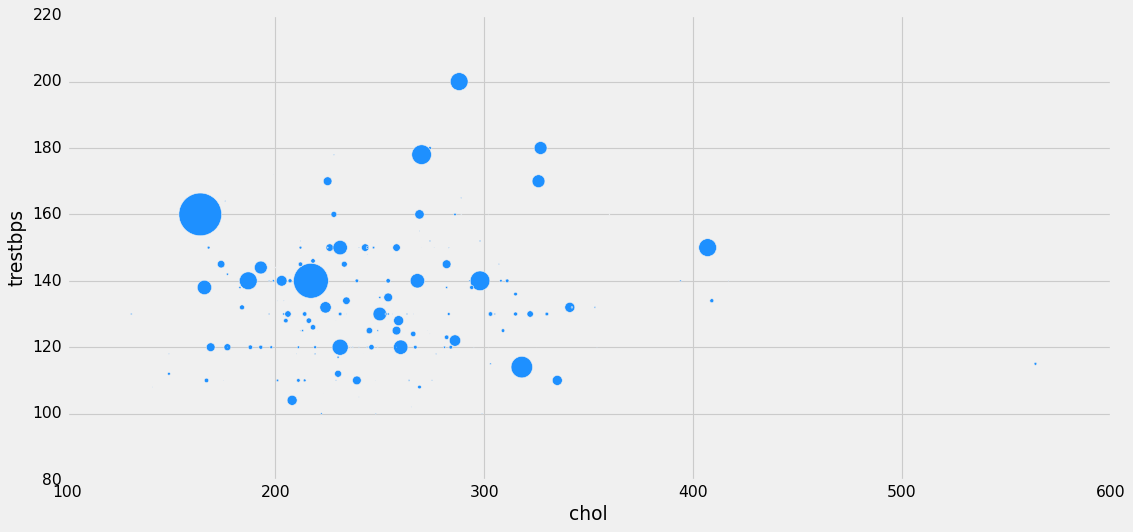

In [63]:
# This list comprehension sets the point sizes ('s') to be the squares of the values in housing['DIS']
heart_df.plot(x='chol', y='trestbps', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=[x**4 for x in heart_df['oldpeak']]);

<a id="seaborn"></a>
## Seaborn `pairplot`

---

- **Objective:** Know when to use Seaborn or advanced Matplotlib.

With the `DataFrame` object `housing`, we will render a pairplot using the Seaborn library.
What do each of the elements represent? Is this more or less useful than the previous plot?

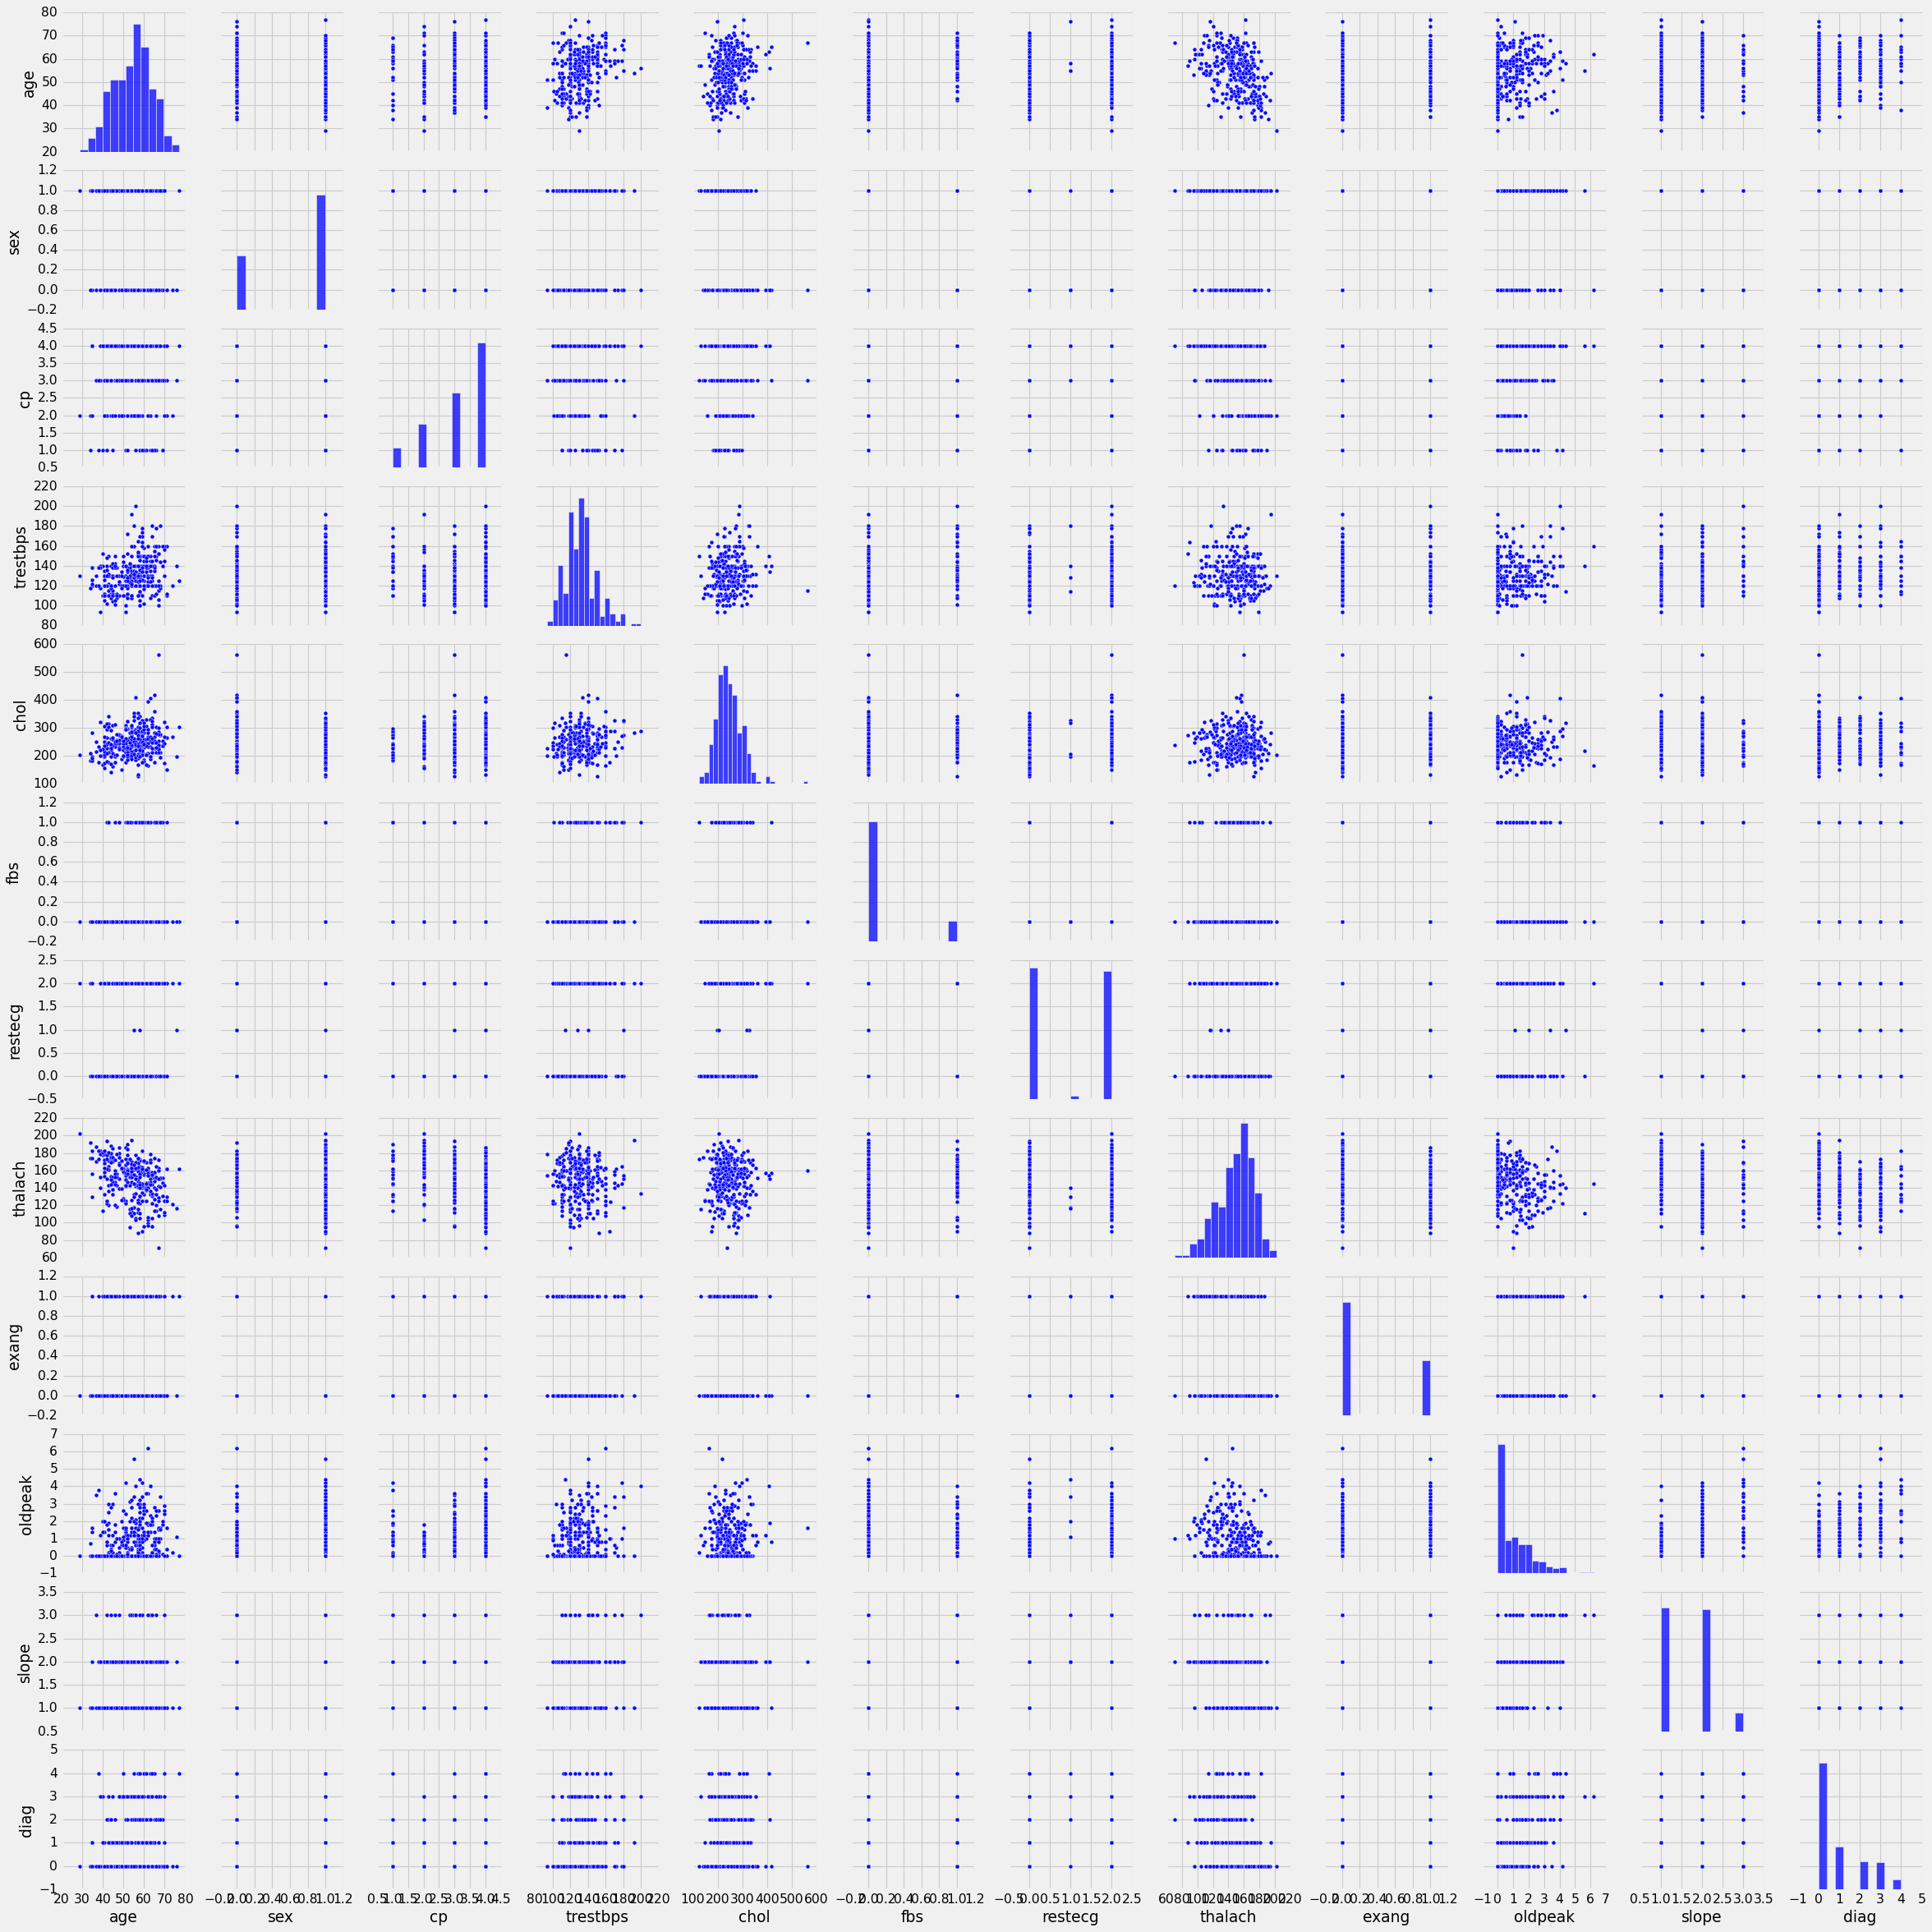

In [64]:
sns.pairplot(heart_df);

**Answer:** _What do each of the elements represent?  Is this more or less useful than the previous plot?_
> In a pair plot we get to see every relationship between every _pair_ of variables.  We can see this is very useful for quickly discovering which variables have some kind of correlation during an exploratory data analysis.  However, when just looking at the `INDUS` feature, the pair plot is more difficult to read and interpret as opposed to the single histogram.  

## Seaborn `heatmap`
---

When you have too many variables, a pairplot or scatter matrix can become impossible to read. We can still gauge linear correlation using a heatmap of the correlation matrix.

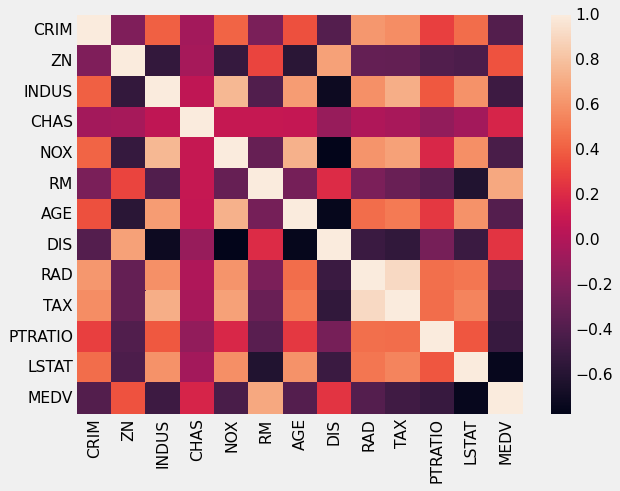

In [65]:
# Make a heatmap on the correlations between variables in the housing data:
housing_correlations = housing.corr();
sns.heatmap(housing_correlations);

### Exercise: Create a scatter plot of two heatmap entries that appear to have a very positive correlation.

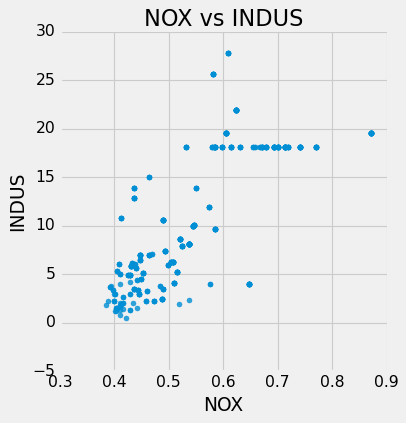

In [66]:
#Create a scatter plot of two heatmap entries that appear to have a very positive correlation. Use seaborn lmplot()

sns.lmplot(x="NOX",y="INDUS", data=housing, fit_reg=False);
plt.title('NOX vs INDUS')
plt.show()

- Now, create a scatter plot of two heatmap entries that appear to have negative correlation.

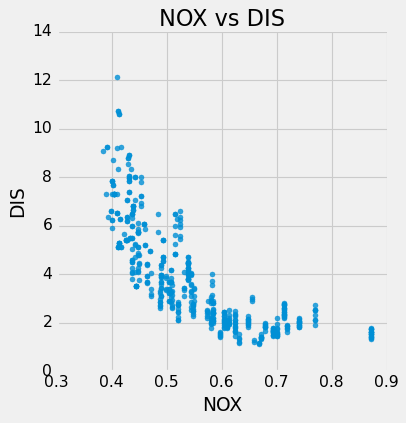

In [67]:
# create a scatter plot of two heatmap entries that appear to have negative correlation.
sns.lmplot(x="NOX",y="DIS", data=housing, fit_reg=False);
plt.title('NOX vs DIS')
plt.show()

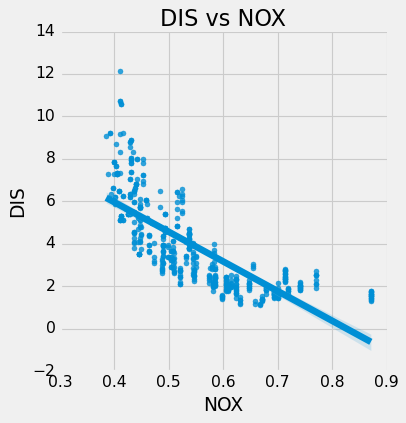

In [68]:
sns.lmplot(x="NOX",y="DIS", data=housing, fit_reg=True);
plt.title('DIS vs NOX')
plt.show()

<a id="matplotlib"></a>
## OPTIONAL: Understanding Matplotlib (Figures, Subplots, and Axes)

---

Matplotlib uses a blank canvas called a figure.

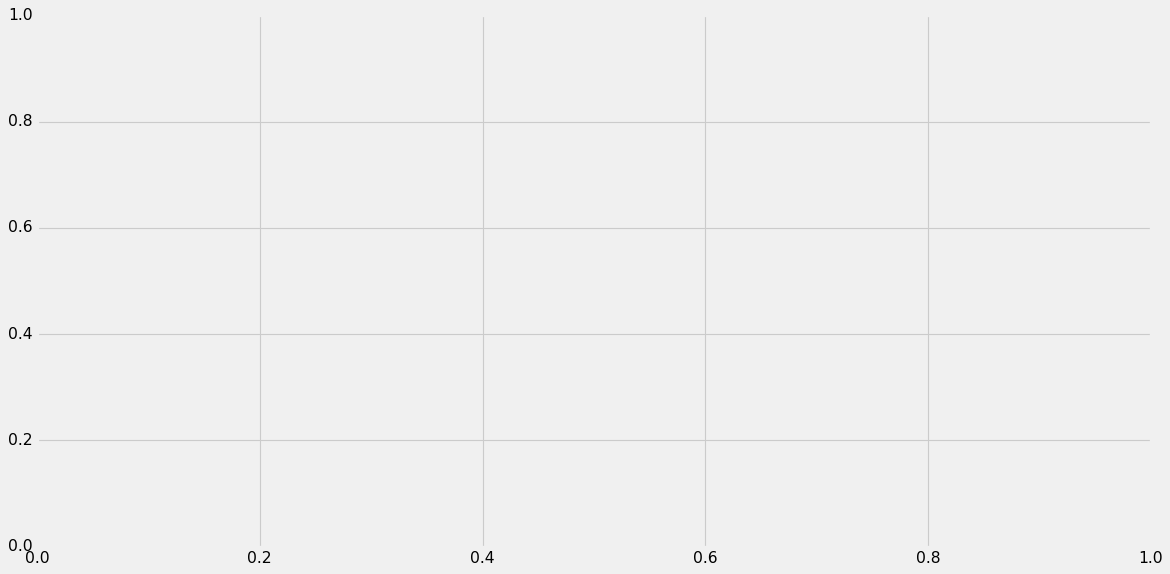

In [69]:
fig = plt.subplots(1,1, figsize=(16,8));

Within this canvas, we can contain smaller objects called axes.

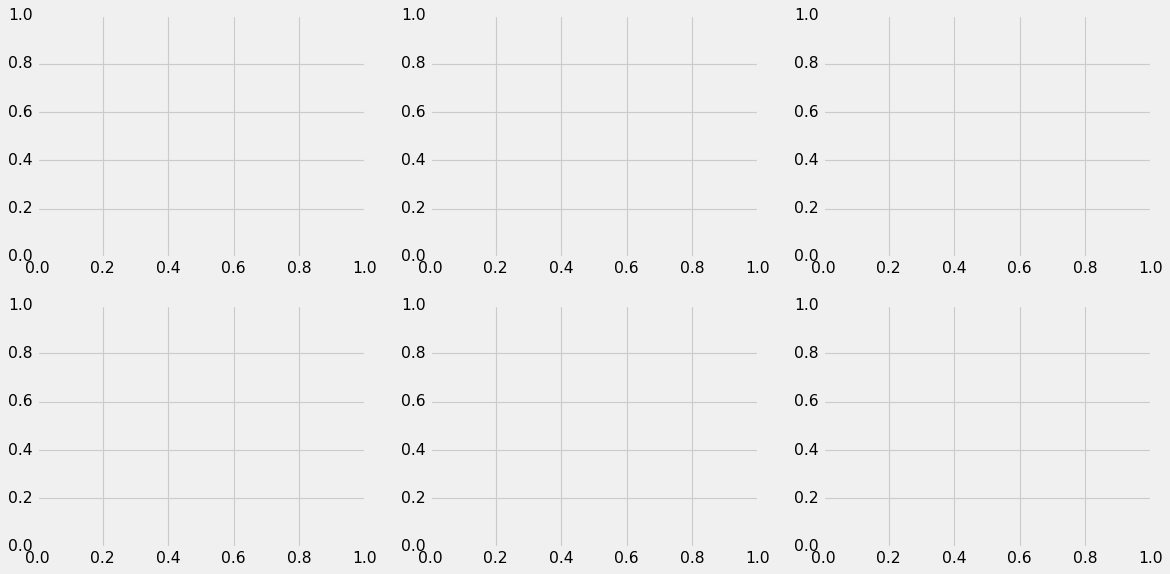

In [70]:
fig, axes = plt.subplots(2,3, figsize=(16,8));

#### Exercise:
Pandas allows us to plot to a specified axes if we pass the object to the ax parameter.

Using the ```df``` dataframe generate the following plots:
1. Plot the full dataframe in the first subplot of the first row.
2. Plot ```col1``` in the second plot, make the line red.
3. Plot ```col2``` in the last plot in the first row, make the line green.
4. Plot ```col3``` in the first plot of the second row, make the line blue.
5. Plot ```col4``` in the second plot in the second row, make the line orange.
6. Plot ```col2``` and ```col3``` in the last plot of the second row, make ```col2``` red and ```col3``` blue.

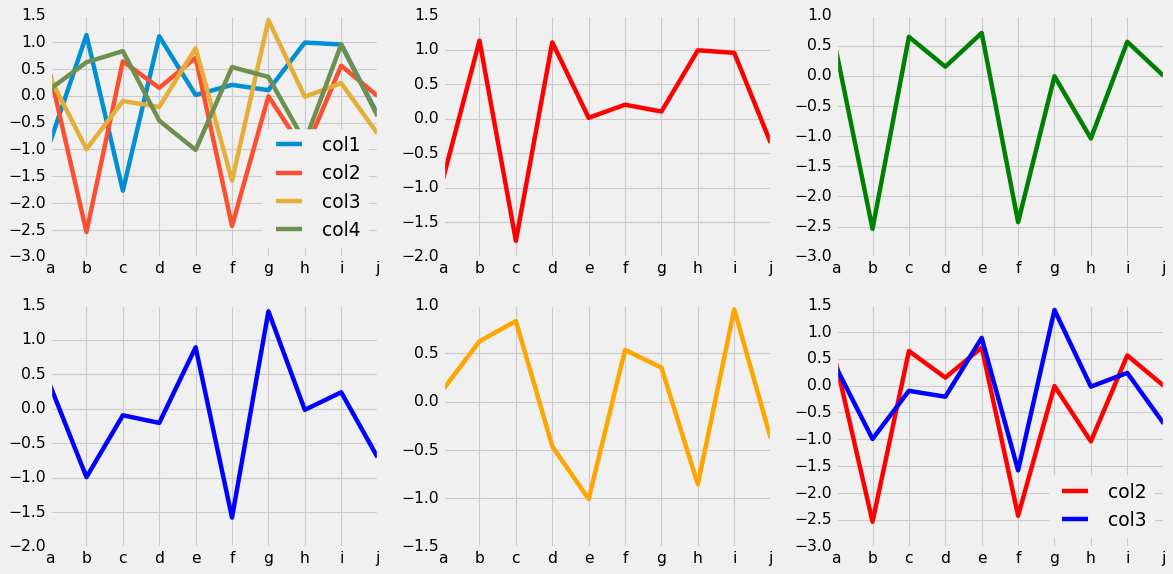

In [71]:
# Answer here.
fig, axes = plt.subplots(2,3, figsize=(16,8))
df.plot(ax=axes[0][0]);
df['col1'].plot(ax=axes[0][1], color='red');
df['col2'].plot(ax=axes[0][2], color='green');
df['col3'].plot(ax=axes[1][0], color='blue');
df['col4'].plot(ax=axes[1][1], color='orange');
df[['col2', 'col3']].plot(ax=axes[1][2], color=['red', 'blue']);


## Let's use a bit more customization.
---

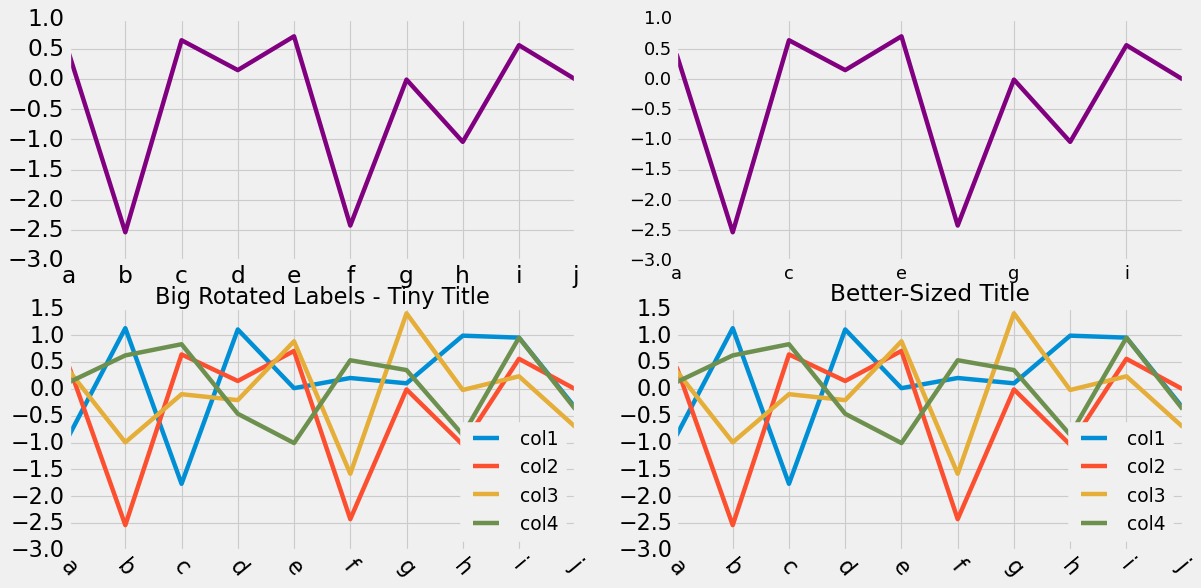

In [72]:
fig, axes = plt.subplots(2,2, figsize=(16,8))

# We can change the ticks' size.
df['col2'].plot(figsize=(16,4), color='purple', fontsize=21, ax=axes[0][0])

# We can also change which ticks are visible.
# Let's show only the even ticks. ('idx % 2 == 0' only if 'idx' is even.)
ticks_to_show = [idx for idx, _ in enumerate(df['col2'].index) if idx % 2 == 0]
df['col2'].plot(figsize=(16,4), color='purple', xticks=ticks_to_show, fontsize=16, ax=axes[0][1])

# We can change the label rotation.
df.plot(figsize=(15,7), title='Big Rotated Labels - Tiny Title',\
        fontsize=20, rot=-50, ax=axes[1][0])\

# We have to use ".set_title()" to fix title size.
df.plot(figsize=(16,8), fontsize=20, rot=-50, ax=axes[1][1])\
       .set_title('Better-Sized Title', fontsize=21, y=1.01);

<a id="additional-topics"></a>
## OPTIONAL: Additional Topics

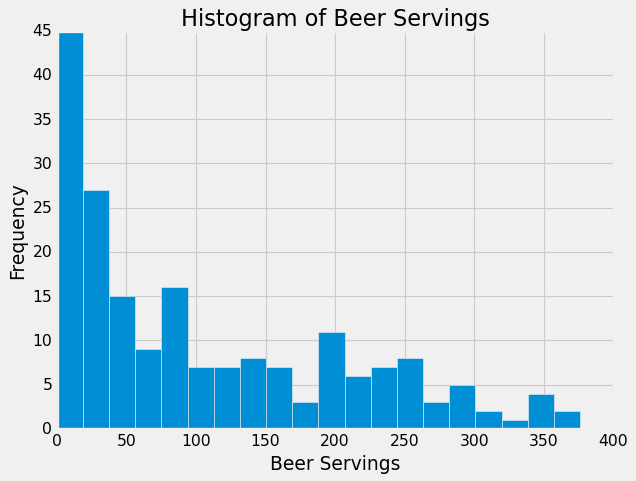

In [73]:
# Saving a plot to a file
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings');
plt.xlabel('Beer Servings');
plt.ylabel('Frequency');
plt.savefig('beer_histogram.png');    # Save to file!

In [74]:
# List available plot styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [75]:
# Change to a different style.
plt.style.use('seaborn-white')

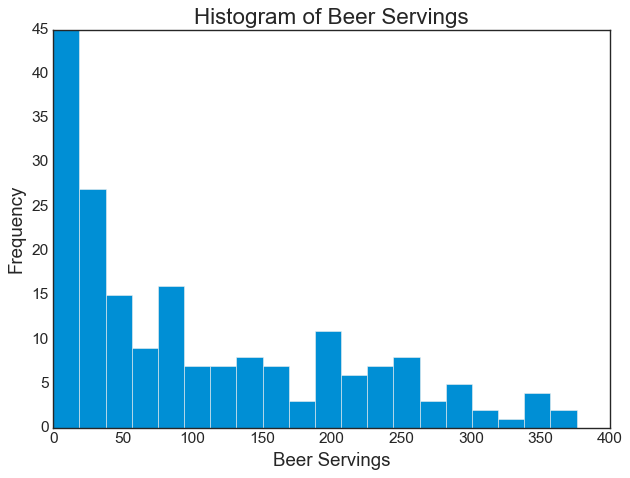

In [76]:
# Saving a plot to a file
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings');
plt.xlabel('Beer Servings');
plt.ylabel('Frequency');
plt.savefig('beer_histogram.png');    # Save to file!

<a id="summary"></a>
### Summary

In this lesson, we showed examples how to create a variety of plots using Pandas and Matplotlib. We also showed how to use each plot to effectively display data.

Do not be concerned if you do not remember everything — this will come with practice! Although there are many plot styles, many similarities exist between how each plot is drawn. For example, they have most parameters in common, and the same Matplotlib functions are used to modify the plot area.

We looked at:
- Line plots
- Bar plots
- Histograms
- Box plots
- Special seaborn plots
- How Matplotlib works